In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [2]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# sns.set_palette("pastel")

In [3]:
data = pd.read_csv('../data/train_month_3_with_target.csv',parse_dates = [29,30,32])
print(f'Rows: {data.client_id.count()}')
print(f'Columns: {data.columns.size}')
print(data.info())
data.head()

Rows: 63697
Columns: 40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  int64         
 2   has_homebanking                    63697 non-null  int64         
 3   has_insurance_21                   63697 non-null  int64         
 4   has_insurance_23                   63697 non-null  int64         
 5   has_life_insurance_fixed_cap       63697 non-null  int64         
 6   has_life_insurance_decreasing_cap  63697 non-null  int64         
 7   has_fire_car_other_insurance       63697 non-null  int64         
 8   has_personal_loan                  63697 non-null  int64         
 9   has_mortgage_loan                  63697 non-null  int64         
 10  has_curren

,client_id,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,...,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,1994-08-01,1,1943-09-01,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,2017-01-01,1,1994-02-01,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,1980-12-01,2,1936-10-01,2660,9.0,0,NaN,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,2013-10-01,1,1946-09-01,6600,9.0,0,NaN,NaN,NaN,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,2012-11-01,2,1996-04-01,8550,9.0,0,NaN,mature,couple,1


In [4]:
data.columns

Index(['client_id', 'homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all',
       'customer_since_bank', 'customer_gender', 'customer_birth_date',
       'customer_postal_code', 'customer_occupation_code',
       'customer_self_employed',

In [5]:
# cast types 

cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','customer_self_employed']

data[cols_binary] = data[cols_binary].astype('bool')
data['target'] = data['target'].astype('bool')

cols_object = ['customer_occupation_code', 'customer_postal_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

data[cols_object] = data[cols_object].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  bool          
 2   has_homebanking                    63697 non-null  bool          
 3   has_insurance_21                   63697 non-null  bool          
 4   has_insurance_23                   63697 non-null  bool          
 5   has_life_insurance_fixed_cap       63697 non-null  bool          
 6   has_life_insurance_decreasing_cap  63697 non-null  bool          
 7   has_fire_car_other_insurance       63697 non-null  bool          
 8   has_personal_loan                  63697 non-null  bool          
 9   has_mortgage_loan                  63697 non-null  bool          
 10  has_current_account               

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bal_insurance_21,63697.0,457.960187,1641.970743,0.0,0.0,0.0,0.0,10000.0
bal_insurance_23,63697.0,47.432375,536.978630,0.0,0.0,0.0,0.0,9890.0
cap_life_insurance_fixed_cap,63697.0,78.260044,2538.927213,0.0,0.0,0.0,0.0,220000.0
cap_life_insurance_decreasing_cap,63697.0,11565.570592,40229.761726,0.0,0.0,0.0,0.0,780000.0
prem_fire_car_other_insurance,63697.0,183.667049,368.599652,0.0,0.0,0.0,240.0,3000.0
bal_personal_loan,63697.0,402.469347,2662.560352,0.0,0.0,0.0,0.0,71690.0
bal_mortgage_loan,63697.0,8868.815486,35525.256697,0.0,0.0,0.0,0.0,490000.0
bal_current_account,63697.0,1323.660612,2685.727023,-1000.0,0.0,0.0,1520.0,20000.0
bal_pension_saving,63697.0,233.421982,2140.173418,0.0,0.0,0.0,0.0,41170.0
bal_savings_account,63697.0,17872.484889,11750.868466,0.0,8450.0,15170.0,25480.0,50000.0


In [7]:
print("-"*50)
print('% NAN:')
print("-"*50)
print((data.isna().sum()/63697).sort_values(ascending = False).head(10))

--------------------------------------------------
% NAN:
--------------------------------------------------
customer_education          0.739831
customer_children           0.366799
customer_relationship       0.233904
customer_occupation_code    0.031430
customer_since_bank         0.003909
customer_since_all          0.003674
visits_distinct_so          0.000000
bal_current_account         0.000000
bal_pension_saving          0.000000
bal_savings_account         0.000000
dtype: float64


In [8]:
print("-"*50)
print('Target classes')
print("-"*50)
print(data.target.value_counts(normalize = True))

--------------------------------------------------
Target classes
--------------------------------------------------
False    0.969967
True     0.030033
Name: target, dtype: float64


In [9]:
# Date to years value conversion 
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

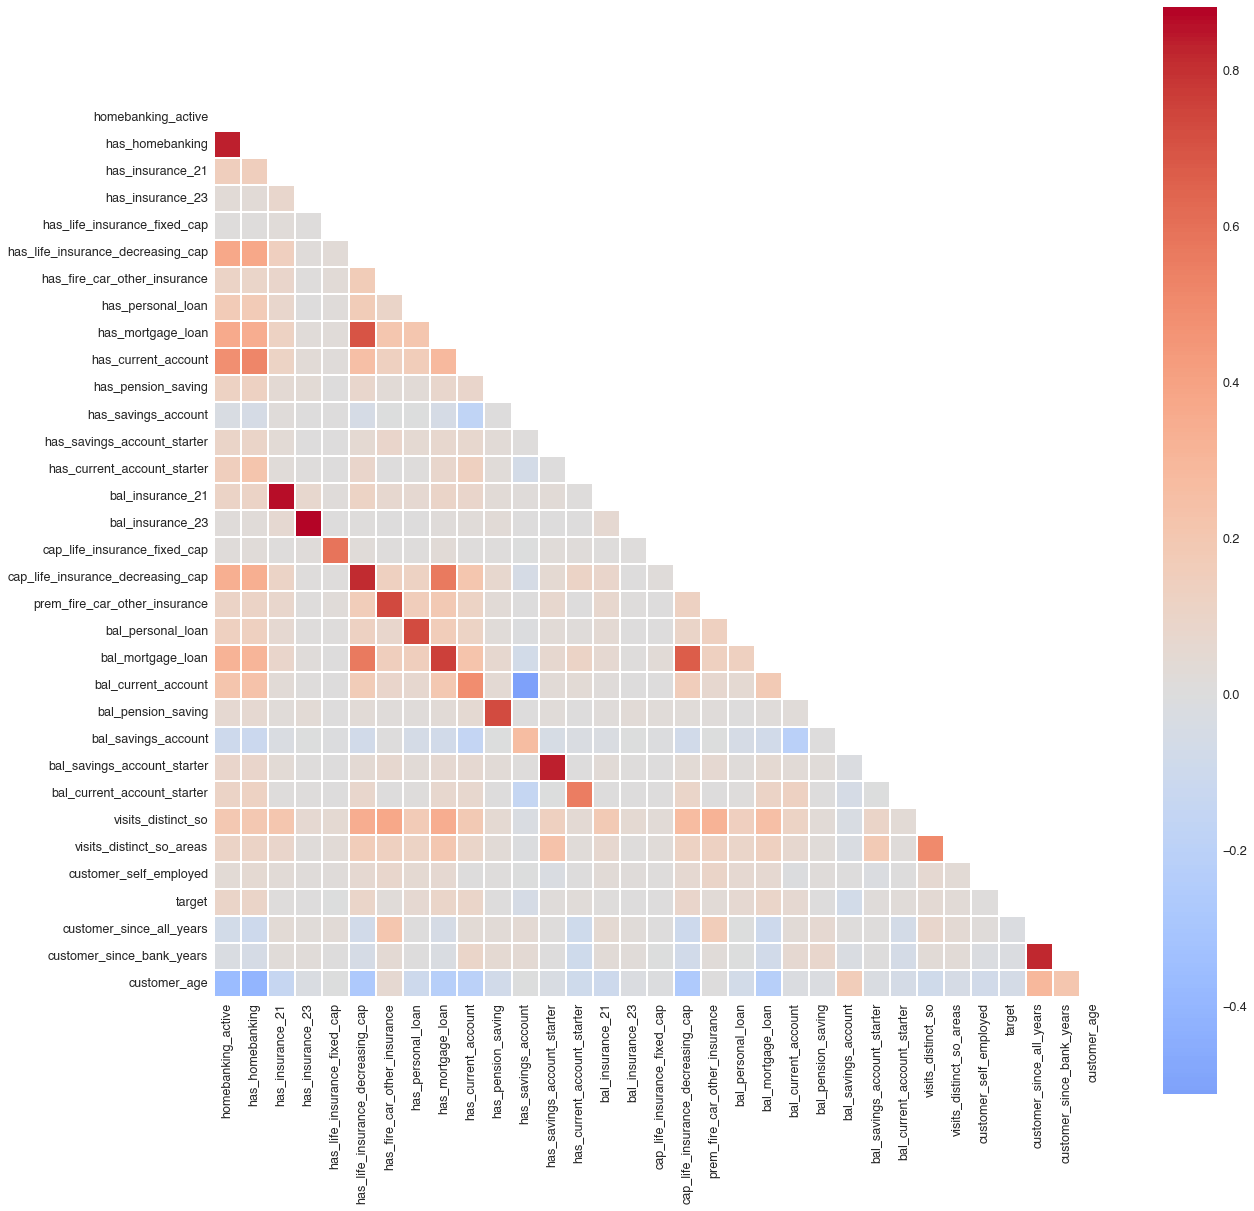

In [10]:
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrs
                     , mask=mask
                     , square=True
                     , center = 0
                     , cmap="coolwarm"
                     , linewidth = 0.1
#                      , robust = True
                    )

In [11]:
print("-"*50)
print('correlations with target')
print("-"*50)
abs(corrs.target).sort_values(ascending = False)

--------------------------------------------------
correlations with target
--------------------------------------------------


target                               1.000000
homebanking_active                   0.101469
has_homebanking                      0.098962
bal_mortgage_loan                    0.096654
has_life_insurance_decreasing_cap    0.094047
has_mortgage_loan                    0.093194
has_current_account                  0.093078
cap_life_insurance_decreasing_cap    0.086488
bal_savings_account                  0.071638
bal_current_account                  0.062886
has_personal_loan                    0.061892
bal_personal_loan                    0.059351
customer_age                         0.059206
has_savings_account                  0.048442
visits_distinct_so                   0.042301
visits_distinct_so_areas             0.026775
prem_fire_car_other_insurance        0.026698
has_fire_car_other_insurance         0.025787
bal_current_account_starter          0.025302
has_current_account_starter          0.023994
has_savings_account_starter          0.018800
customer_since_all_years          

In [12]:
print('-'*65)
print('are missing value correlated with target?')
print('-'*65)
check_corr = ['customer_education','customer_children','customer_relationship','customer_occupation_code','customer_since_bank']
for var in check_corr:
    print('%s:\t%f' % (var,data[var].isna().corr(data.target) ))

-----------------------------------------------------------------
are missing value correlated with target?
-----------------------------------------------------------------
customer_education:	-0.109084
customer_children:	-0.005475
customer_relationship:	-0.000317
customer_occupation_code:	0.008896
customer_since_bank:	0.009614


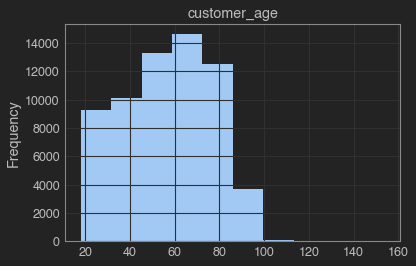

Customers over 115 y/o: 33
Customers over 115 y/o (churners): 0


In [13]:
data['customer_age'].plot(kind = 'hist', title = 'customer_age')
age_threshold = 115
outlier = data[(data['customer_age']>age_threshold)].client_id.count()
outlier1 = data[(data['customer_age']>age_threshold)&(data['target']==1)].client_id.count()
plt.show()
print('Customers over %i y/o: %i' % (age_threshold,outlier))
print('Customers over %i y/o (churners): %i' % (age_threshold,outlier1))

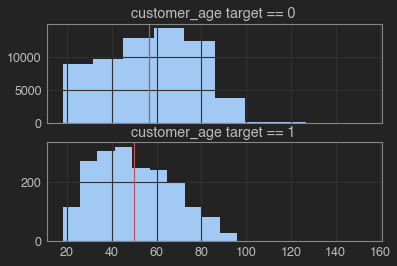

In [14]:
col = 'customer_age'
f,(ax1,ax2)=plt.subplots(2,1,sharex = True)
ax1.hist(data[data['target']==0][col])
ax1.set_title(col + ' target == 0 ')
ax1.axvline(x = np.mean(data[data['target']==0][col]), color = 'r')
ax2.hist(data[data['target']==1][col])
ax2.set_title(col + ' target == 1 ')
ax2.axvline(x = np.mean(data[data['target']==1][col]), color = 'r')

<AxesSubplot:xlabel='customer_age', ylabel='Probability'>

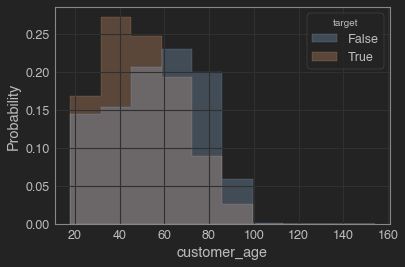

In [15]:
sns.histplot(data = data
                 ,x = 'customer_age'
                 ,hue = 'target'
                 ,stat = "probability"
                 ,common_norm = False
                 ,bins = 10
                 ,element="step"
            )

In [16]:
print('-'*65)
print('are missing value correlated with target?')
print('-'*65)
print(abs(data.corr().customer_age).sort_values(ascending = False).head(10))

-----------------------------------------------------------------
are missing value correlated with target?
-----------------------------------------------------------------
customer_age                         1.000000
has_homebanking                      0.405673
homebanking_active                   0.365088
customer_since_all_years             0.295172
has_life_insurance_decreasing_cap    0.270308
cap_life_insurance_decreasing_cap    0.262327
has_mortgage_loan                    0.224595
bal_mortgage_loan                    0.223849
customer_since_bank_years            0.208135
has_current_account                  0.202742
Name: customer_age, dtype: float64


In [17]:
data.customer_occupation_code.value_counts(normalize = True)

9.0    0.953659
4.0    0.026566
0.0    0.006824
8.0    0.005154
6.0    0.002966
5.0    0.002480
7.0    0.001686
1.0    0.000389
3.0    0.000162
2.0    0.000113
Name: customer_occupation_code, dtype: float64

In [18]:
data.groupby('customer_occupation_code').target.value_counts(normalize = True)

customer_occupation_code  target
0.0                       False     0.973872
                          True      0.026128
1.0                       False     1.000000
2.0                       False     1.000000
3.0                       False     0.900000
                          True      0.100000
4.0                       False     0.958511
                          True      0.041489
5.0                       False     0.928105
                          True      0.071895
6.0                       False     0.945355
                          True      0.054645
7.0                       False     0.961538
                          True      0.038462
8.0                       False     0.962264
                          True      0.037736
9.0                       False     0.970783
                          True      0.029217
Name: target, dtype: float64

In [24]:
data.select_dtypes(include = 'number')

,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all_years,customer_since_bank_years,customer_age
0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,35.0,24.0,75
1,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,1.0,1.0,24
2,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,38.0,38.0,82
3,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,20.0,5.0,72
4,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,6.0,6.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63692,2420,0,0,0,0,0,0,80,0,17060,0,0,2.0,1.0,20.0,20.0,36
63693,7810,0,0,0,1180,0,13030,2690,0,22400,0,0,2.0,1.0,29.0,29.0,53
63694,0,0,0,186000,520,0,179550,2920,0,6820,0,0,3.0,1.0,27.0,27.0,42
63695,0,0,0,0,0,0,0,0,0,5690,0,0,1.0,1.0,4.0,4.0,67


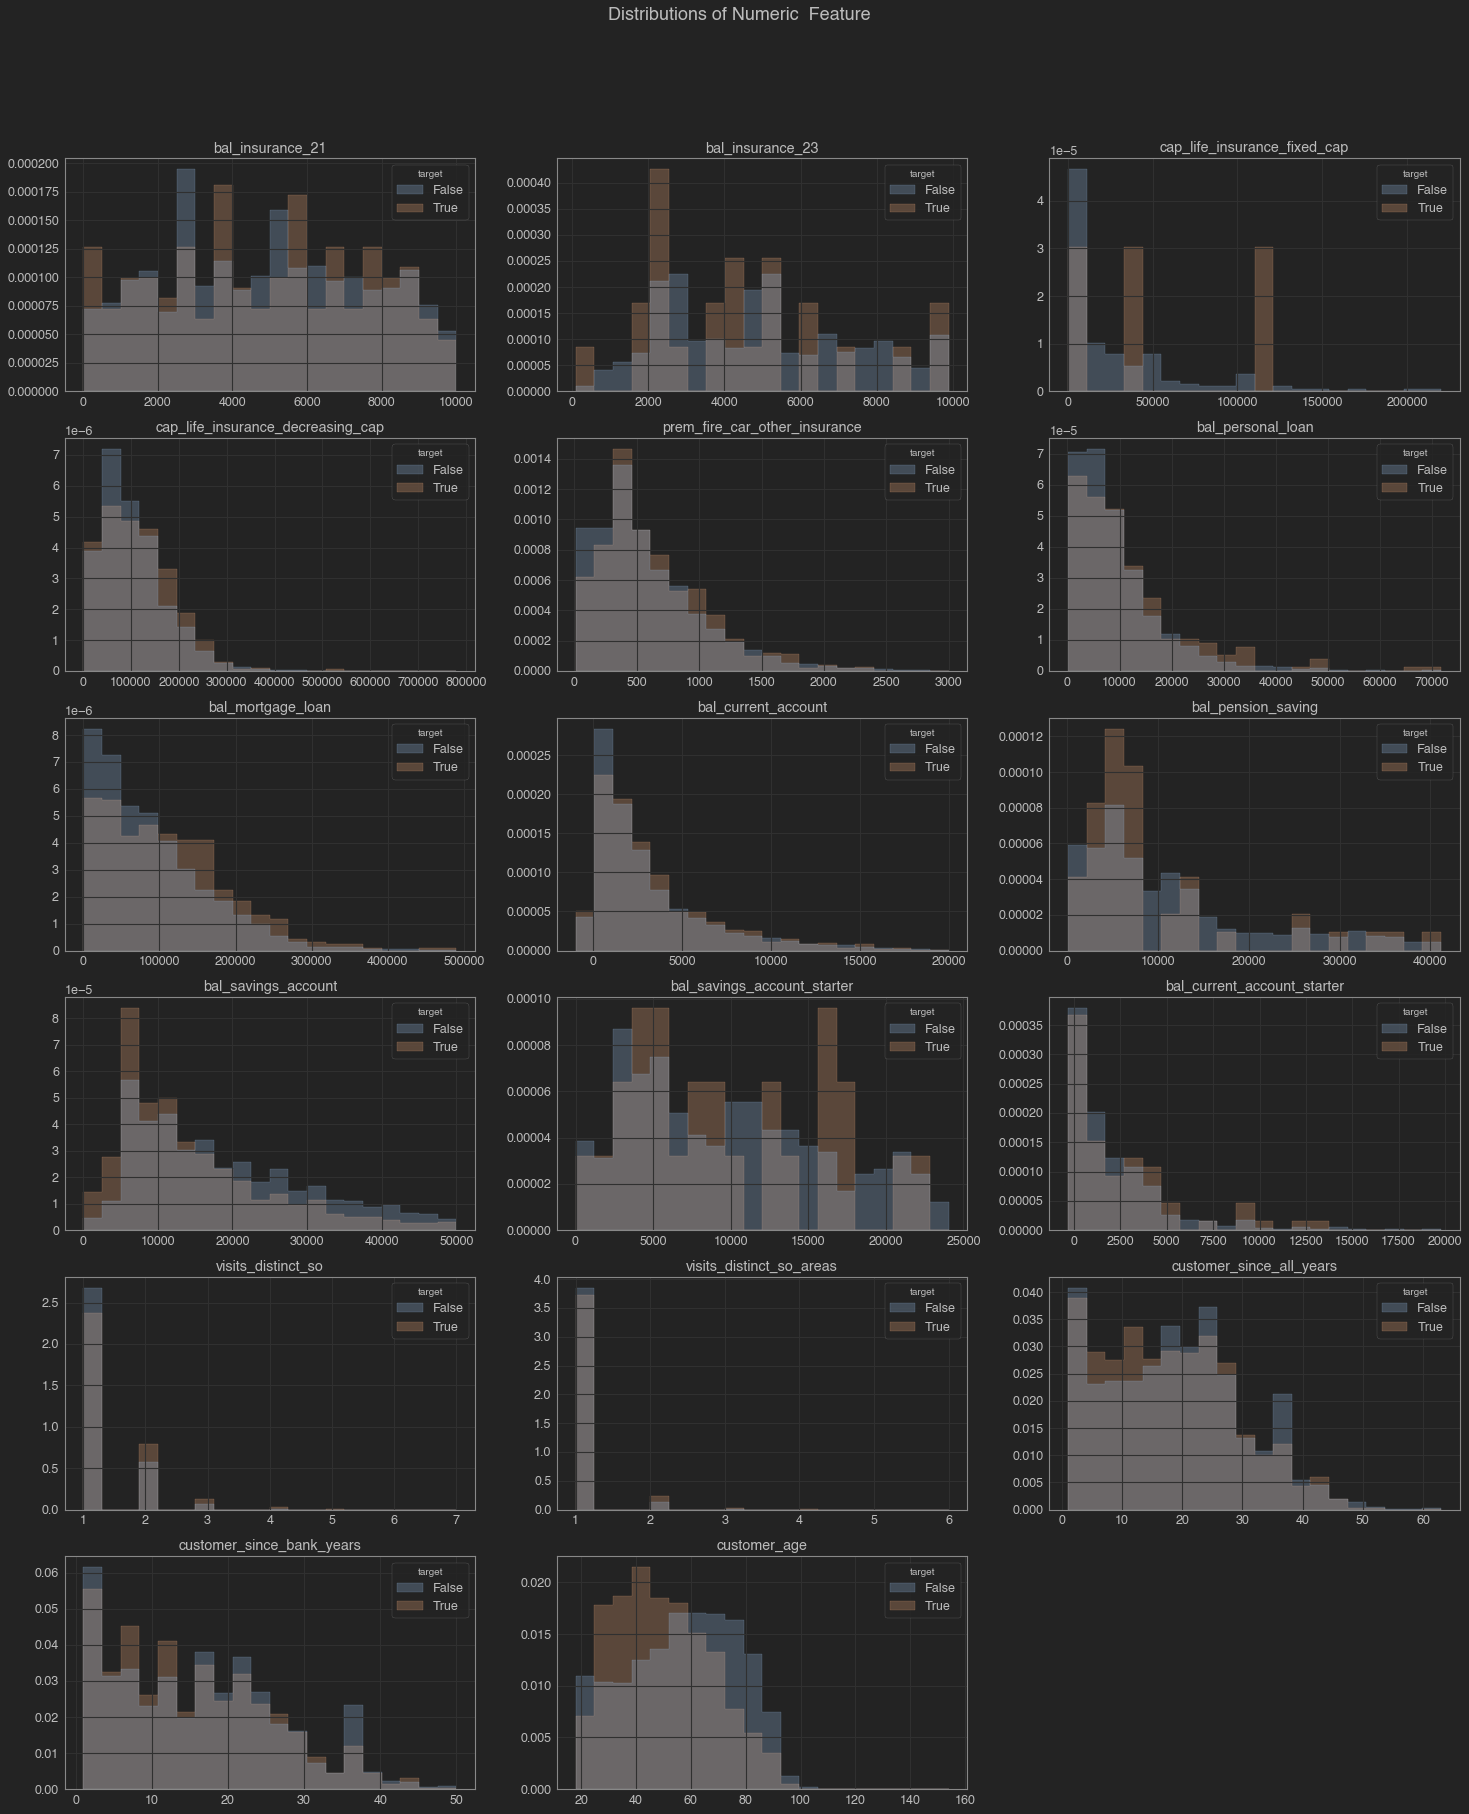

In [25]:
plt.figure(figsize=(25, 30))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Distributions of Numeric  Feature", fontsize=18, y=0.95)

cols_cont = data.select_dtypes(include = 'number').columns
ncols = 3
nrows = len(cols_cont) // ncols + (len(cols_cont) % ncols > 0) # calculate number of rows

for n, col in enumerate(cols_cont):
    ax = plt.subplot(nrows, ncols, n + 1) 
    data_nozero = data[data[col]!=0]
    sns.histplot(data = data_nozero
                 ,x = col
                 ,hue = 'target'
                 ,bins = 20
                 ,stat = "density"
                 ,common_norm = False
                 ,element="step"
                ).set(xlabel=None, ylabel = None)
    plt.title(col)

plt.show()

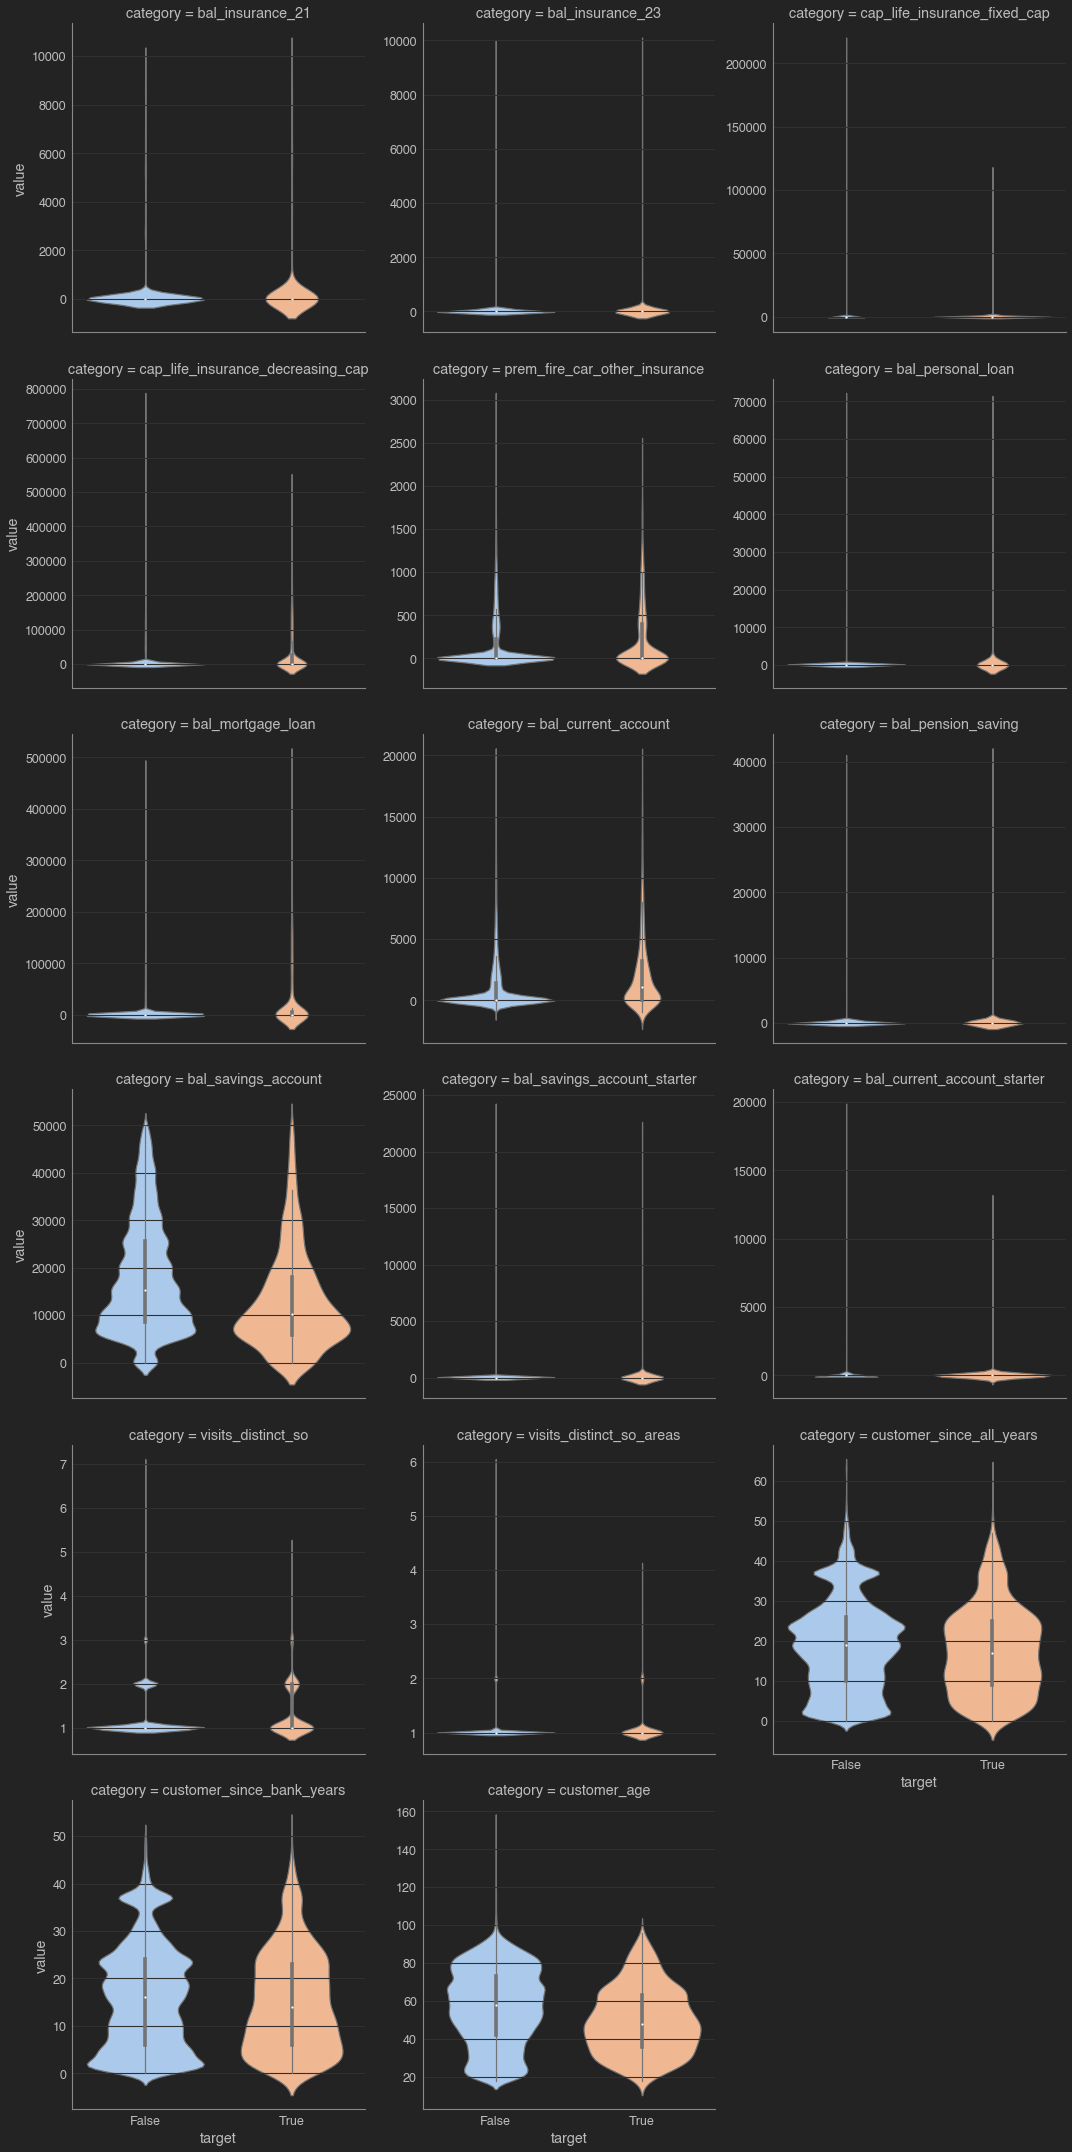

In [26]:
data_melt = data.melt(id_vars = ("client_id","target"), value_vars = cols_cont, var_name = "category")
sns.catplot(data=data_melt
            ,x="target"
            ,y="value"
            ,col="category"
            ,kind="violin"
            ,sharey = False
            ,col_wrap=3);

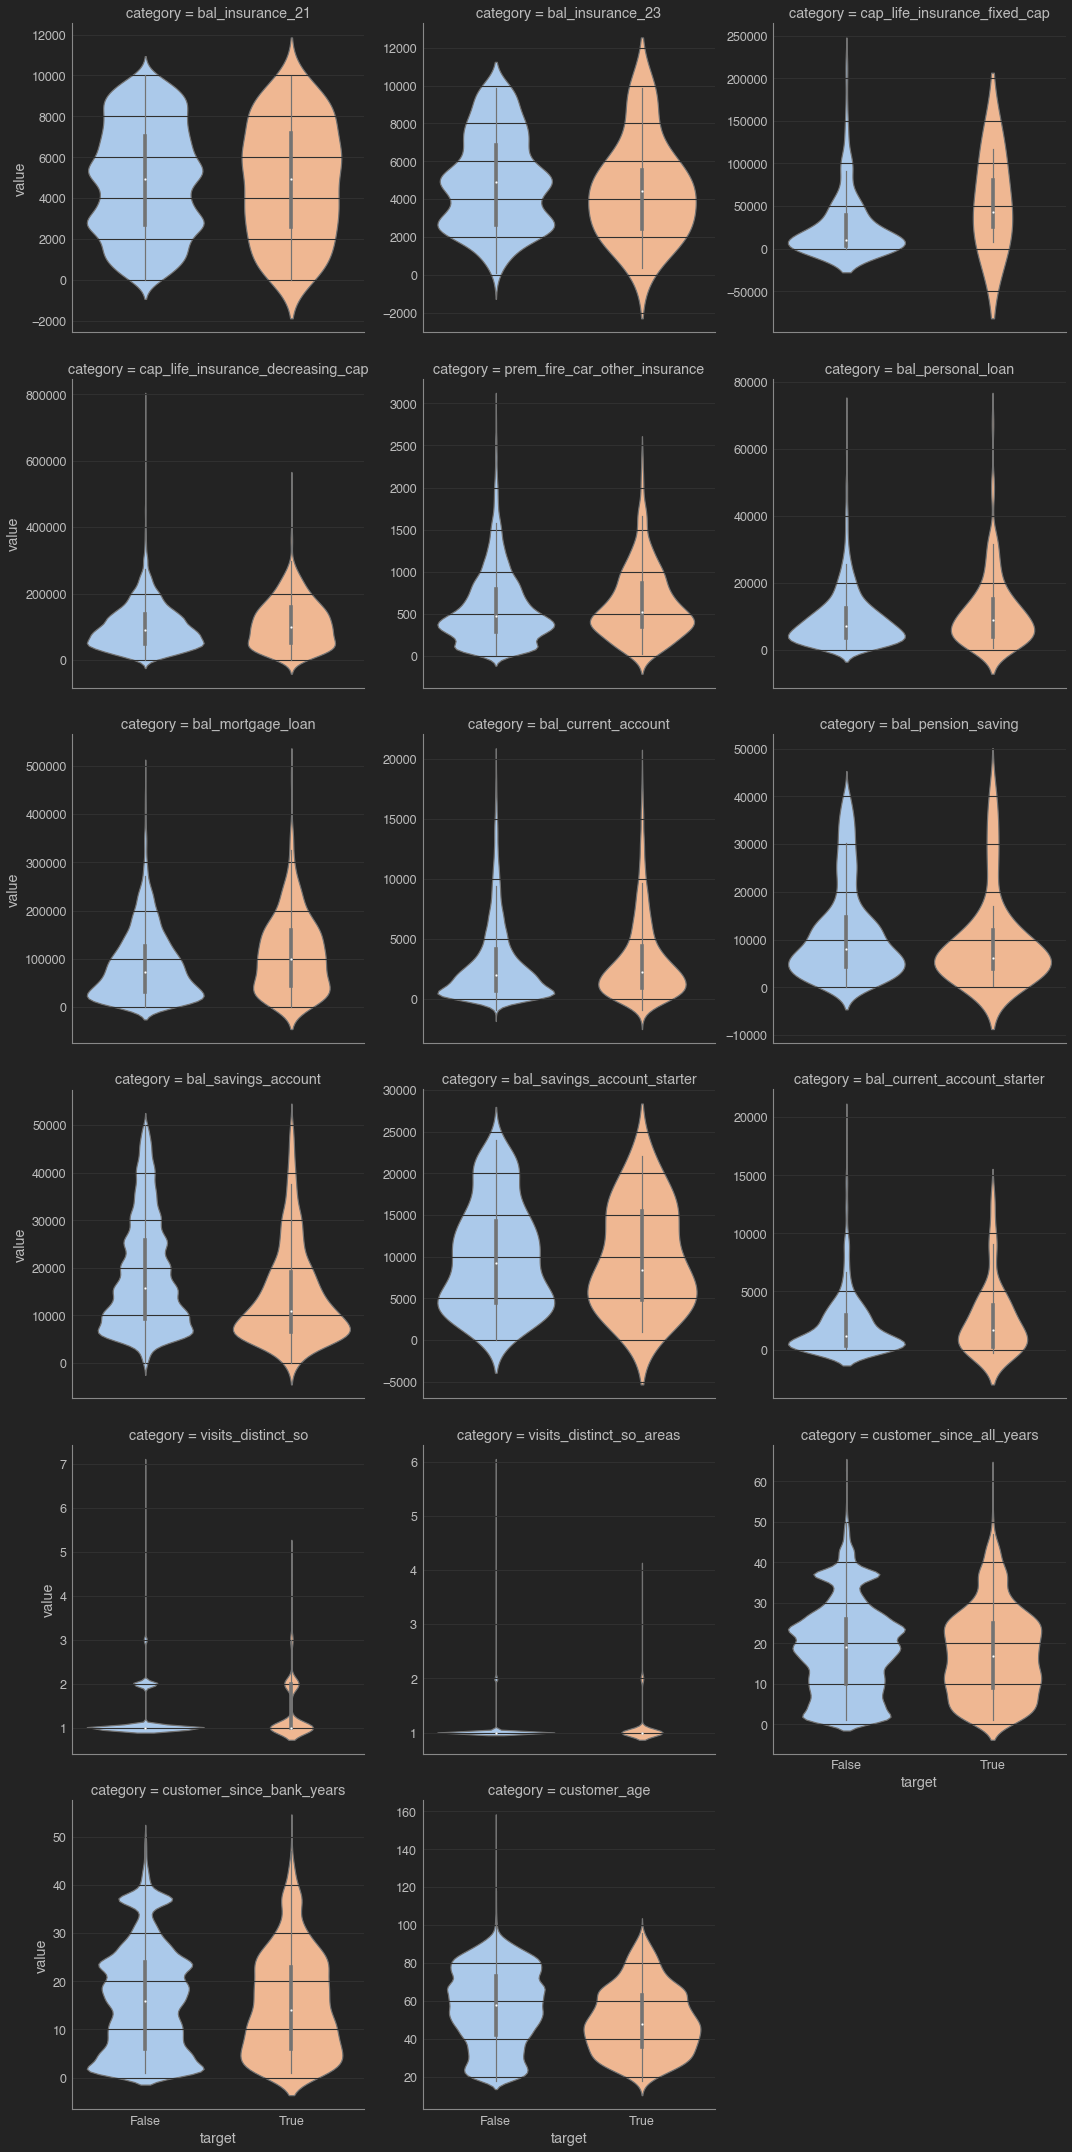

In [27]:
data_melt = data.melt(id_vars = ("client_id","target"), value_vars = cols_cont, var_name = "category")
sns.catplot(data=data_melt[data_melt.value != 0]
            ,x="target"
            ,y="value"
            ,col="category"
            ,kind="violin"
            ,sharey = False
            ,col_wrap=3);

In [28]:
print('-'*65)
print('Customers with savings account balance of 0')
print('-'*65)
print(data[["has_savings_account","bal_savings_account","target"]][data.bal_savings_account <=0].sum())
print('-'*65)
print('Customers with checking account balance <= 0')
print('-'*65)
print(data[["has_current_account","bal_current_account","target"]][data.bal_current_account <=0].sum())

-----------------------------------------------------------------
Customers with savings account balance of 0
-----------------------------------------------------------------
has_savings_account     80
bal_savings_account      0
target                 150
dtype: int64
-----------------------------------------------------------------
Customers with checking account balance <= 0
-----------------------------------------------------------------
has_current_account     4697
bal_current_account   -76380
target                   613
dtype: int64


Take away: just because balance is 0 doesn't mean they doesn't have that account - particularly with savings this combination seems to have a big correlation with churn

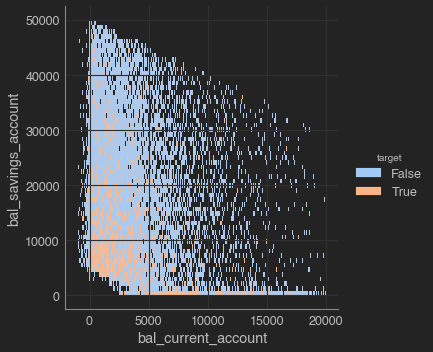

In [29]:
sns.displot(data=data
                , x = 'bal_current_account'
                , y = 'bal_savings_account'
                , hue = 'target'
               )

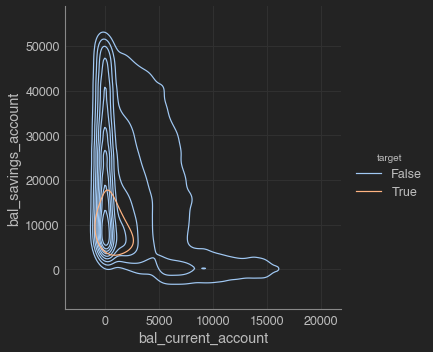

In [30]:
# g = sns.displot(data=data
#                 , x = 'bal_current_account'
#                 , y = 'bal_savings_account'
#                 , hue = 'target'
#                 , kind = 'kde'
#                )

In [58]:
# data_melt = data.melt(id_vars = ("client_id","target")
#                       , value_vars = data.select_dtypes(include = 'object')
#                       , var_name = "category")
# data_melt

In [ ]:
# sns.catplot(data=data_melt
#             ,hue="target"
#             ,x="value"
#             ,col="category"
#             ,kind = 'count'
# #             ,kind="violin"
#             ,sharey = False
#             ,col_wrap=3);

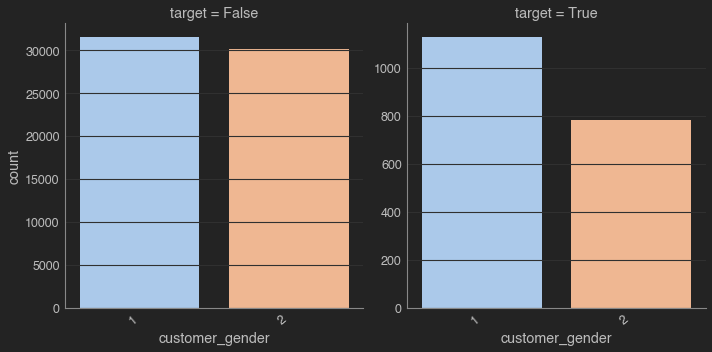

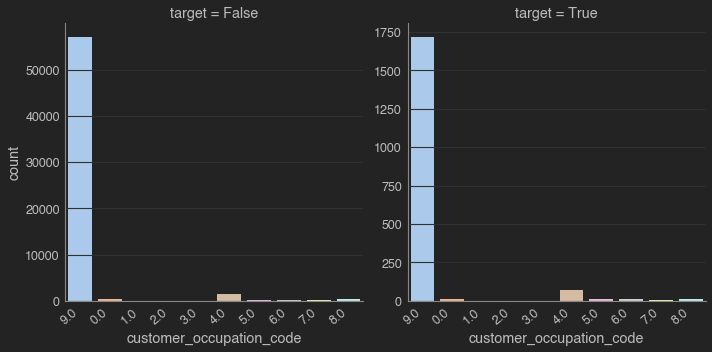

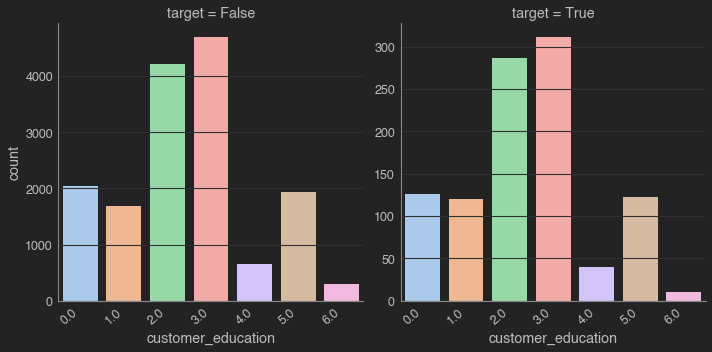

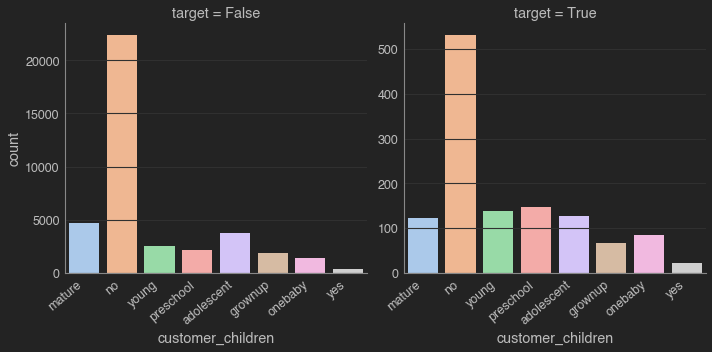

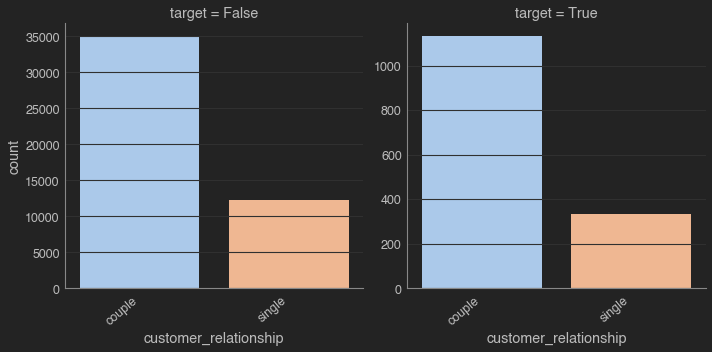

In [70]:
def my_cat_plot(data,X):
    ax = sns.catplot(data = data
                , kind = 'count'
                , x = X
                , col = 'target'
                , sharey = False
               )
#     ax = sns.catplot(data = data
#                 , kind = 'count'
#                 , x = 'target'
#                 , col = X
#                 , sharey = False
#                )

    ax.set_xticklabels(rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    
col_object = data.select_dtypes(include = 'object')
col_object.drop(columns = ['customer_postal_code','client_id'], inplace = True)

for col in col_object.columns:
    my_cat_plot(data,col)